<h1>Kickstarter: Analisis Exploratorio de Datos</h1>

- Carlos
- Carlos
- Pablo


<h1>Un poco sobre Kickstarter: </h1>

<b>Kickstarter</b>
es una corporación estadounidense de beneficio público con sede en Brooklyn, Nueva York, que mantiene una plataforma global de financiación colectiva centrada en la creatividad. La misión declarada de la empresa es "ayudar a dar vida a proyectos creativos". Según los informes, Kickstarter ha recibido más de $ 1.9 mil millones en promesas de 9.4 millones de patrocinadores para financiar 257,000 proyectos creativos, como películas, música, espectáculos teatrales, cómics, periodismo, videojuegos, tecnología y proyectos relacionados con la comida.

A las personas que respaldan los proyectos de Kickstarter se les ofrecen recompensas o experiencias tangibles a cambio de sus promesas. Este modelo tiene sus raíces en el modelo de suscripción de patrocinio artístico, en el que los artistas acudían directamente a sus audiencias para financiar su trabajo.


In [1]:
!pip install pandas
!pip install seaborn
!pip install plotly

In [2]:
#Load the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
from collections import Counter

In [ ]:
#loading the data 
df_kick = pd.read_csv("ks-projects-201801.csv")
df_kick = df_kick.sample(10000, random_state=42).reset_index().drop('index', axis=1)

## Funciones de normalización.
- Con el fin a comprender el dataset con el que trabajaremos, sera elaborado un resumen del mismo que nos permitira ver con que clase de datos estaremos trabajando.</h2>

In [20]:
#resumetable, a partir de un dataset genera un resumen de su contenido incluyendo dtypes, cant de campos null, uniques, entropia
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary


In [5]:
#extrayendo informacion del dataset
resumetable(df_kick)

Dataset Shape: (10000, 15)


Name   dtypes  Missing  Uniques          First Value  \
0                 ID    int64        0    10000           1576537356   
1               name   object        0     9999                 Deko   
2           category   object        0      158             Hardware   
3      main_category   object        0       15           Technology   
4           currency   object        0       14                  USD   
5           deadline   object        0     2617           2015-10-24   
6               goal  float64        0      779                70000   
7           launched   object        0    10000  2015-09-24 03:12:52   
8            pledged  float64        0     4601                 1888   
9              state   object        0        6               failed   
10           backers    int64        0      718                   41   
11           country   object        0       23                   US   
12       usd pledged  float64      105     5165                 1888   
13  usd_pledged_real  float64        0     5660                 1888   
14     usd_goal_real  float64        0     2769                70000   

                                         Second Value            Third Value  \
0                                           675907016              361890770   
1   Westside BJ's: The Gluten-Free, Organic Food T...  Crepe Diem Food Truck   
2                                         Food Trucks                   Food   
3                                                Food                   Food   
4                                                 USD                    USD   
5                                          2015-02-01             2014-01-17   
6                                              250000                  30000   
7                                 2015-01-02 20:55:07    2013-12-18 03:26:04   
8                                                1466                   5723   
9                                              failed                 failed   
10                                                  9                     90   
11                                                 US                     US   
12                                               1466                   5723   
13                                               1466                   5723   
14                                             250000                  30000   

    Entropy  
0     13.29  
1     13.29  
2      6.24  
3      3.57  
4      1.27  
5     11.06  
6      6.50  
7     13.29  
8     10.16  
9      1.52  
10     6.52  
11     1.47  
12    10.16  
13    10.67  
14     8.19

<b>Resumen del contenido del dataset con el que se trabajara</b>

<h2>Conociendo el contenido del dataset</h2>

In [6]:
#Visualizando la informacion
df_kick.head()

ID                                               name     category  \
0  1576537356                                               Deko     Hardware   
1   675907016  Westside BJ's: The Gluten-Free, Organic Food T...  Food Trucks   
2   361890770                              Crepe Diem Food Truck         Food   
3  1225211551  Season's End - A horror novel ready for public...      Fiction   
4  2122944289        Colorado City Arizona Restaurant (Canceled)  Restaurants   

  main_category currency    deadline      goal             launched  pledged  \
0    Technology      USD  2015-10-24   70000.0  2015-09-24 03:12:52   1888.0   
1          Food      USD  2015-02-01  250000.0  2015-01-02 20:55:07   1466.0   
2          Food      USD  2014-01-17   30000.0  2013-12-18 03:26:04   5723.0   
3    Publishing      GBP  2016-11-23    5500.0  2016-10-24 15:44:36     25.0   
4          Food      USD  2015-05-13   30000.0  2015-03-14 05:18:34    100.0   

      state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
0    failed       41      US      1888.00           1888.00       70000.00  
1    failed        9      US      1466.00           1466.00      250000.00  
2    failed       90      US      5723.00           5723.00       30000.00  
3    failed        2      GB        23.24             31.09        6839.01  
4  canceled        3      US       100.00            100.00       30000.00

<b>id:</b> ID interno de kickstarter

<b>name:</b>nombre del proyecto, un proyecto es un trabajo finito con un objetivo claro que le gustaría darle vida. Piense en álbumes, libros o películas.

<b>category:</b>categoria

<b>main_category:</b> categoria de la campaña de atraccion de patrocinadores a la que pertenece

<b>currency:</b> moneda utilizada para apoyar

<b>deadline:</b> fecha límite para crowdfunding

<b>goal:</b> Objetivo de recaudación de fondos: el objetivo de financiación es la cantidad de dinero que un creador necesita para completar su proyecto.

<b>launched:</b> fecha de lanzamiento

<b>pledged:</b> cantidad prometida por participantes

<b>state:</b> Estado actual en el que se encuentra el proyecto

<b>country:</b> pais

# Campo State
- Lo que en primera instancia parece informacion interesante la cual podemos agrupar e incluso visualizar a traves de un grafico es el estado de los proyectos</h2>

In [13]:
state = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red', 'blue', 'green', 'yellow', 'cian', 'magenta']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

La grafica evidencia el aglomerado de proyectos a partir su estado <br>
Como se puede obserbar solo el 36% de todos los proyectos han sido exitosos<br>
Mas de 60% han sido cancelados<br>

- Con esta informacion seria interesante conocer la distribucion de los proyectos y tomando en cuenta el pocentaje de proyectos que han fallado podriamos trabajar con este grupo. </h2>



# Trabajando sobre el grupo de Proyectos Fallidos.

In [14]:
df_kick.head()

ID                                               name     category  \
0  1576537356                                               Deko     Hardware   
1   675907016  Westside BJ's: The Gluten-Free, Organic Food T...  Food Trucks   
2   361890770                              Crepe Diem Food Truck         Food   
3  1225211551  Season's End - A horror novel ready for public...      Fiction   
4  2122944289        Colorado City Arizona Restaurant (Canceled)  Restaurants   

  main_category currency    deadline      goal             launched  pledged  \
0    Technology      USD  2015-10-24   70000.0  2015-09-24 03:12:52   1888.0   
1          Food      USD  2015-02-01  250000.0  2015-01-02 20:55:07   1466.0   
2          Food      USD  2014-01-17   30000.0  2013-12-18 03:26:04   5723.0   
3    Publishing      GBP  2016-11-23    5500.0  2016-10-24 15:44:36     25.0   
4          Food      USD  2015-05-13   30000.0  2015-03-14 05:18:34    100.0   

      state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
0    failed       41      US      1888.00           1888.00       70000.00  
1    failed        9      US      1466.00           1466.00      250000.00  
2    failed       90      US      5723.00           5723.00       30000.00  
3    failed        2      GB        23.24             31.09        6839.01  
4  canceled        3      US       100.00            100.00       30000.00

- Empezaremos agrupando algunas categorias y luego filtrar los proyectos en dos grupos por estado (exitosos y fallidos)</h2>

In [17]:
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])]

# Distribucion de Metas
- En primer lugar, la razon por la que los proyectos fallan principalmente es debido a que no se alcanza la meta establecida. Por lo tanto analizaremos la distribucion de las metas que se alcanzaron y que no.

In [22]:
df_failed = df_kick[df_kick["state"] == "failed"].sample(10000, replace=True)
df_failed.head(5)

ID                                               name  \
740   1007121454  Nail Art and Photos Printed on your Nails w/ E...   
5987  1534079534             The Animated Tale of Three Wunderbooks   
7552  2144428394                             ALT - "The Other Desk"   
5452   350015508                                            Cookies   
5523   783831336                               Lamos Exotic Candles   

              category main_category currency    deadline     goal  \
740                Art           Art      USD  2014-01-14  20000.0   
5987  Children's Books    Publishing      USD  2012-10-29  15000.0   
7552    Product Design        Design      USD  2016-11-17  20000.0   
5452       Small Batch          Food      GBP  2014-08-08     10.0   
5523           Candles        Crafts      USD  2015-06-04   5000.0   

                 launched  pledged   state  backers country  usd pledged  \
740   2013-12-15 02:53:49      6.0  failed        2      US          6.0   
5987  2012-09-29 07:02:45    694.0  failed       18      US        694.0   
7552  2016-10-18 08:04:09   2115.0  failed        7      US          0.0   
5452  2014-07-09 23:00:30      0.0  failed        0      GB          0.0   
5523  2015-05-05 08:04:53      0.0  failed        0      US          0.0   

      usd_pledged_real  usd_goal_real  
740                6.0        20000.0  
5987             694.0        15000.0  
7552            2115.0        20000.0  
5452               0.0           16.8  
5523               0.0         5000.0

In [23]:
df_sucess = df_kick[df_kick["state"] == "successful"].sample(10000, replace=True)
df_sucess.head(5)

ID                                 name         category  \
4115  1398074936                      Life In Lapland   Graphic Design   
2612   777498970           I want to make big cookies      Small Batch   
9067  1112535953  Sight.Sound.Soul. with Henry Butler  Performance Art   
5610  1068271559                     Legendary Rupees           Crafts   
8963  1078600171     GET A GRIP! w/Mobile Grip Gloves          Fashion   

     main_category currency    deadline     goal             launched  \
4115        Design      USD  2014-04-20   2625.0  2014-03-15 19:27:37   
2612          Food      USD  2015-08-07     50.0  2015-07-23 23:49:49   
9067           Art      USD  2011-08-22   8100.0  2011-06-08 16:15:34   
5610        Crafts      CAD  2014-01-20    600.0  2013-12-16 20:37:08   
8963       Fashion      USD  2014-05-11  14000.0  2014-04-11 16:52:09   

       pledged       state  backers country  usd pledged  usd_pledged_real  \
4115   2669.50  successful       61      US      2669.50           2669.50   
2612    350.00  successful       27      US       350.00            350.00   
9067   8104.50  successful       74      US      8104.50           8104.50   
5610   4707.00  successful      196      CA      4446.68           4255.11   
8963  14719.06  successful      114      US     14719.06          14719.06   

      usd_goal_real  
4115         2625.0  
2612           50.0  
9067         8100.0  
5610          542.4  
8963        14000.0

In [28]:
#First plot
Goals = go.Histogram(
    x= np.log(df_kick.usd_goal_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-5.0,
        end=19.0,
        size=1),
    autobiny=True)

#Second plot
Pledged = go.Histogram(
    x = np.log(df_kick.usd_pledged_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-1.0,
        end=17.0,
        size=1))

# Add histogram data
failed = np.log(df_failed['usd_goal_real']+1)
success = np.log(df_sucess["usd_goal_real"]+1)

goals_Failed = go.Histogram(
    x=failed,
    opacity=0.60, nbinsx=30, name='Goals Failed', histnorm='probability'
)
goals_success = go.Histogram(
    x=success,
    opacity=0.60, nbinsx=30, name='Goals Sucessful', histnorm='probability'
)


data = [Goals, Pledged, goals_Failed, goals_success]
layout = go.Layout(barmode='overlay')

#Creating the grid
fig = plotly.tools.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                          subplot_titles=('Failed and Sucessful Projects',
                                          'Goal','Pledged'))

#setting the figs
fig.append_trace(Goals, 2, 1)
fig.append_trace(Pledged, 2, 2)
fig.append_trace(goals_Failed, 1, 1)
fig.append_trace(goals_success, 1, 1)

fig['layout'].update(title="Distribuitions",
                     height=500, width=900, barmode='overlay')
iplot(fig)


- Interesante distribucion de los valores sobre las metas y lo que se obtuvo desde el periodo de lanzamiento hasta la fecha limite <br>
- Observe el grafico con titulo Goal, el histograma simétrico en forma de campana clásico con la mayoría de los recuentos de frecuencias agrupados en el medio y con los recuentos desapareciendo en las colas. Desde el punto de vista de la ciencia física / ingeniería, la distribución normal es la distribución que ocurre con mayor frecuencia en la naturaleza (debido en parte al teorema del límite central). Por lo tanto seria ideal probar la normalidad de la distribucion de metas y si existe alguna diferencia estadistica entre proyectos exitosos y fallidos.</h2>

# Test de normalidad.
- Tomando en cuenta el grafico de Goal anterior y viendo que se asimila a una distibucion normal seria interesante probar si la distribucion de metas es normal
- Para probar si una distribución se ajusta a un conjunto de datos, El analisis de distribucion utiliza la transformación a la normal asociada con esa distribución. Luego aplica una prueba de normalidad para ver si los valores transformados se ajustan a la distribución normal. El analizador de distribución incluye tres pruebas de normalidad: <b>Prueba de Anderson-Darling (AD)</b> <b>Prueba de Shapiro-Wilks (SW)</b>, <b>Prueba de asimetría-curtosis total (SK todo)</b>.

- Las tres pruebas anteriores están diseñadas para detectar todas las desviaciones de la normalidad. Responden a la pregunta: "¿Los datos se ajustan a la distribución normal?"

- En este caso y sabiendo que la libreria spicy nos permite hacer esta evaluacion utilizaremos el metodo de Shapiro-Wilks. La prueba rechaza la hipótesis de normalidad cuando el valor p es menor o igual a 0.05. No aprobar la prueba de normalidad nos permite afirmar con un 95% de confianza que los datos no se ajustan a la distribución normal. Pasar la prueba de normalidad solo le permite afirmar que no se encontró una desviación significativa de la normalidad.

In [31]:
stat, p = stats.shapiro(np.log(df_kick['usd_goal_real']+1).sample(500, random_state=42))

print("Shapiro stat:", stat)
print("P-value: ", p)
if p >= .01:
    print('Normal Distribution')
else:
    print("Non-Normal Distribution")

Shapiro stat: 0.9852833151817322
P-value:  6.028682037140243e-05
Non-Normal Distribution


- OK, Basado en los resultados vemos que el agrupamiento de las metas no sigue una distribucion normal, de todas formas es posible determinar la variacion mediante la prueba T</h2>

- Teniendo en cuenta los resultados obtenidos ahora nos fijaremos en el grupo de proyectos exitosos. Sobre este grupo y partiendo de lo hallado acerca del grupo de proyectos fallidos podemos hacer 3 suposiciones:

    1. Normalidad. Suponemos que los datos de la población muestreada tienen una distribución normal. Esta suposición es particularmente importante para muestras pequeñas. En muestras más grandes (n> 30), el error estándar es menor y como resultado, esta suposición se vuelve menos crítica.
    2. Muestreo aleatorio. Suponemos que los datos medidos se obtuvieron de una muestra que se seleccionó mediante un procedimiento de muestreo aleatorio.
    3. Independencia. Suponemos que cada resultado u observación es independiente, lo que significa que un resultado no influye en otro. Específicamente, los resultados son independientes cuando la probabilidad de un resultado no tiene efecto sobre la probabilidad de otro resultado. El uso de muestreo aleatorio generalmente satisface este supuesto.

- Por lo tanto es posible calcular la prueba t de una muestra, que se utiliza para comparar un valor medio medido en una muestra con un valor conocido en la población. Específicamente, esta prueba se utiliza para probar hipótesis sobre la media de uno o dos grupo seleccionado de una población con una varianza desconocida. 

# T- Test :
- Una prueba t es un tipo de estadística inferencial que se utiliza para determinar si existe una diferencia significativa entre las medias de dos grupos que pueden estar relacionados en determinadas características. Se usa principalmente cuando los conjuntos de datos, como el conjunto de datos registrados como resultado de lanzar una moneda 100 veces, seguirían una distribución normal y podrían tener variaciones desconocidas. La prueba T se utiliza como una herramienta de prueba de hipótesis, que permite probar un supuesto aplicable a una población.

- T-test puede ser de 2 tipos : 1. one sampled t-test 2. two-sampled t-test.

_______________________________
# One sampled t-test

- One sample t-test : La prueba t para una muestra determina si la media muestral es estadísticamente diferente de una media poblacional conocida o hipotetizada. La prueba t para una muestra es una prueba paramétrica.

    Args: 
    * cols: lista con, probaremos la media de la población y la media muestral
    * H0: La hipótesis nula es que ambas distribuciones son iguales
    * H1: La hipótesis alternativa es que las distribuciones son diferentes

In [ ]:

def chi2_test(col, prob=.95):
    stat, p, dof, expected = stats.chi2_contingency((pd.crosstab(df_kick[col[0]], 
                                                                 df_kick[col[1]]
                                                                )))
    print("CHI-SQUARED TEST: ")
    # calculating the value to compare with chi2 statistic
    critical = stats.chi2.ppf(prob, dof)
    print(f'dof={dof}, probability={round(prob,3)}, critical={round(critical,5)}, stat={round(stat,5)}')
    print("Accept or Reject H0: ")
    # interpret test statistic
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

def ttest_onesided(cols, alpha = 0.05):
    """
    
    cols: lista con, probaremos la media de la población y la media muestral
    H0: La hipótesis nula es que ambas distribuciones son iguales
    H1: La hipótesis alternativa es que las distribuciones son diferentes
    
    """
    pop_mean = cols[0].mean()
    sample = cols[1]
    
    print(f"Media de la poblacion: {pop_mean} \nMedia de muestra: {sample.mean()}")
    ttest_val, pval = stats.ttest_1samp(sample, pop_mean)

    print(f"valor t-test : {ttest_val}")
    print("Comparando p_value por...\n")
    print(f'resultado p-value: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print("Rechazamos la hipotesis nula, ambas distribuciones no son iguales")
    else:
      print("Aceptamos la hipotesis nula, distribuciones diferentes")

def ttest_twosided(cols, alpha = 0.05):
    sample1 = cols[0]
    sample2 = cols[1]
    print(f"Mean of Sample 1: {sample1.mean()} \nMean of Sample 2: {sample2.mean()}")    
    ttest_val, pval = stats.ttest_ind(sample1, sample2)

    print(f"t-test value: {ttest_val}")
    # print("Comparing p_value by...\n")
    print(f'p-value result: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print(" we are rejecting null hypothesis")
    else:
      print("we are accepting null hypothesis")

In [ ]:
ttest_onesided([np.log(df_kick['usd_goal_real']+1), success])

Cool. As we are rejecting the null hypothesis, the success projects have a diferent distribution than total population

# Two-sampled t-test
- La prueba t de muestras independientes o la prueba t de 2 muestras compara las medias de dos grupos independientes para determinar si existe evidencia estadística de que las medias poblacionales asociadas son significativamente diferentes. La prueba t de muestras independientes es una prueba paramétrica. Esta prueba también se conoce como: Prueba t independiente.


In [12]:
ttest_twosided([failed, success], alpha=.01)

Mean of Sample 1: 8.866066188347562 
Mean of Sample 2: 8.169717233674197
t-test value: 31.402010184564663
p-value result: 2.5171461972924448e-211
 we are rejecting null hypothesis


- La hipótesis nula es que ambos datos son iguales y, como fue rechazado, podemos estar seguros de que el valor objetivo de los proyectos exitosos y fallidos es diferente. <br>
- Según la distribución del histograma anterior, el proyecto fallido parece tener un valor más alto. <br>
- Antes de profundizar en él, veamos las otras características que tenemos a disposición.

# naaah Scaling and engineering some features

In [13]:
df_kick['pledged_log'] = np.log(df_kick['usd_pledged_real'] + 1)
df_kick['goal_log'] = np.log(df_kick['usd_goal_real'] + 1)

df_kick['diff_pledged_goal'] = round((df_kick['usd_pledged_real'] /df_kick['usd_goal_real']) * 100, 2)
df_kick['diff_pledged_goal'] = df_kick['diff_pledged_goal'].astype(float)

<h2>Description of the continous variables</h2>

In [14]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       1.0
pledged    0.0
dtype: float64

Mean Goal and Pledged values
goal       40044.00
pledged    11077.32
dtype: float64

Median Goal and Pledged values
goal       5000.0
pledged     826.0
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       1116049.80
pledged     116746.11
dtype: float64


<h2>Looking the State variable</h2>
- pledge log by state
- goal log by state
- goal log x pledged log

In [15]:
#First plot
trace0 = go.Box(
    x=df_kick['state'],
    y=df_kick['goal_log'],
    name="Goal Log", showlegend=False
)
#Second plot
trace1 = go.Box(
    x=df_kick['state'],
    y=df_kick['pledged_log'],
    name="Pledged Log", showlegend=False
)
#Third plot
trace2 = go.Scatter(
    x=df_kick['goal_log'], y=df_kick['pledged_log'],
    name="Goal x Pledged Distribuition", 
    showlegend=False,
    mode = 'markers'
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal','Pledged',
                                          "Goal x Pledged (Both Log)"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Goal Log and Pledged Log by State of Projects",
                     xaxis=dict(
                         title='State', ticklen=5, zeroline=False, gridwidth=2
                     ),
                     yaxis=dict(
                         title='Goal(Log)', ticklen=5, gridwidth=2
                     ),
                     xaxis1=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis1=dict(title='Goal(Log)', ticklen=5, gridwidth=2),
                     xaxis2=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis2=dict(title='Pledged(Log)', ticklen=5, gridwidth=2))
iplot(fig)

Cool. As we saw in your stastical test, the difference between 

<h2>Analizando estado de los proyectos por categoria: </h2>

- Frecuencia de categorias exitosas

- Frecuencia de categorias exitosas

- Distribucion de meta general por categoria

In [16]:
main_cats = df_kick["main_category"].value_counts()
main_cats_failed = df_kick[df_kick["state"] == "failed"]["main_category"].value_counts()
main_cats_sucess = df_kick[df_kick["state"] == "successful"]["main_category"].value_counts()

In [17]:
#First plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Failed Categories"
)
#Second plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Success Categories"
)
#Third plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="Categories Distribuition"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True,
                     title="Main Category's Distribuition",
                     bargap=0.05)
iplot(fig)

- Podemos notar que los proyectos fallidos y exitosos tienen diferentes frecuencias;

- Una prueba importante que podemos usar es la prueba de chi-cuadrado para comparar las dos categorías y asegurarnos de que sean estadísticamente diferentes.

## Chi-Squared test
>Chi-cuadrado es una gran herramienta para comparar resultados que involucran datos categóricos. Podemos ver cómo una muestra se desvía de la distribución esperada. La biblioteca SciPy de Python proporciona excelentes herramientas para ejecutar pruebas de chi-cuadrado.

Haremos una prueba de dos características categóricas Categoría principal y Estado;
Tengo dos hipótesis:
H0: Las categorías principales son las mismas en ambos estados.
H1 (o alternativa): Las principales categorías de ambos estados son diferentes.

Ejecutemos el chi2_test:<br>

In [18]:
       
chi2_test(['state','main_category'])

CHI-SQUARED TEST: 
dof=14, probability=0.95, critical=23.68479, stat=406.18842
Accept or Reject H0: 
Dependent (reject H0)


Cool!!! <br>

Chi Squared return to us ChiSquared Statistic, Degree of Freedom, p-value and the contingecy table;<br>

We used the significance level and the dof to calcute the critical value and see if we need to accept or reject the H0 hypothesis.

Now, we can be sure that exists significantly difference between the categories of successful and failed projects.


<h2>Looking the Goal and Pledged Means by State</h2>

In [19]:
print("Looking Goal and Pledged Mean by state ")
print(round(df_kick.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))

Looking Goal and Pledged Mean by state 
                goal  usd_pledged_real
state                                 
failed      61668.01           1243.84
successful   9288.93          24162.95


We have a high mean and standard deviation... Interesting values. <br>
Let's known better the distribuition of this values using log scale

<h2>We have a very interesting distribuition in goal values.</h2>

In [20]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]
categorys_general = df_kick["category"].value_counts()[:25]

#First plot
trace0 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'].head(100000),
    histnorm='percent', name="Top 15 Failed", showlegend=False
)
#Second plot
trace1 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'].head(100000),
    histnorm='percent', name="Top 15 Sucessful", showlegend=False
)

#Third plot
trace2 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'].head(100000),
    histnorm='percent', name="Top 25 All Category's", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Top 15 Failed','Top 15 Sucessful', "Top 25 All Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Top Frequency Category's")
iplot(fig)

## I will take a further look at top 10 sucessful and failed categorys.
I will look at:
- Goal
- Pledged
- diff_pleded_goal 

In [21]:
#First plot
trace0 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['pledged_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'],
    y=df_kick[(df_kick.category.isin(categorys_general.index.values))]['pledged_log'].head(100000),
    name="All Category's Distribuition", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Main Category's Distribuition")
iplot(fig)

We can see that almost all categorys in sucessful have the same distribuition of values but some video games projects have the highest values in % difference of Pledged by Goal 

## Now I will take a look at top 10 failed categorys

In [22]:
cat_fill = df_kick[df_kick.category.isin(categorys_failed[:10].index.values)]

#First plot
trace0 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['goal_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=cat_fill['category'],
    y=np.log(cat_fill['diff_pledged_goal'] + 1).head(100000),
    name="Pledged", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal Log','Pledged Log', "Diff of Pledged and Goal", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Distribuition of Values by Top 10 Categorys")
iplot(fig)



<h2>Now I will start to Investigating the 3 top sucess and fail projects</h2>


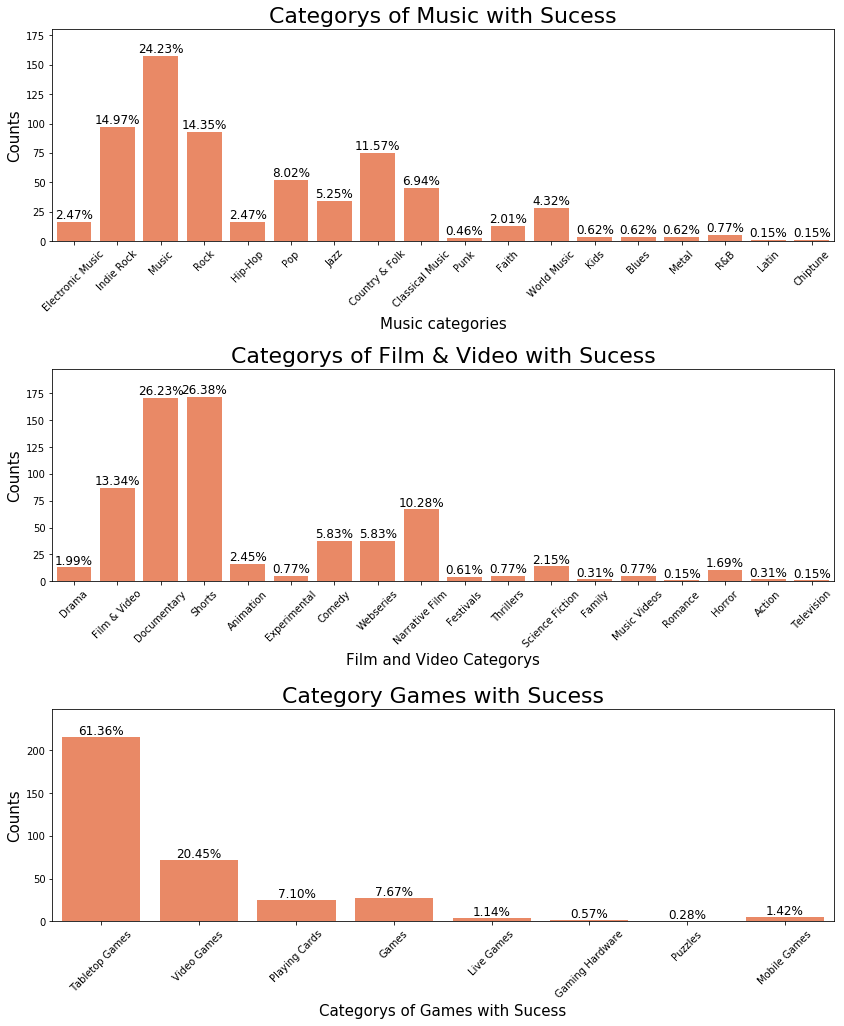

In [23]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]

plt.figure(figsize=(14,16))
total = len(df_kick)
plt.subplot(311)
ax0 = sns.countplot(x='category', data=sucess_music,
                    color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categorys of Music with Sucess", fontsize=22)
ax0.set_xlabel("Music categories", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_music)*100),
            ha="center", fontsize=12) 
ax0.set_ylim(0, max(sizes) * 1.15)


plt.subplot(312)
ax1 = sns.countplot(x='category', data=sucess_filme_video,
                    color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categorys of Film & Video with Sucess", fontsize=22)
ax1.set_xlabel("Film and Video Categorys", fontsize=15)
ax1.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_filme_video)*100),
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
ax2 = sns.countplot(x='category', data=sucess_games,
                    color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Category Games with Sucess", fontsize=22)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=15)
ax2.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_games)*100),
            ha="center", fontsize=12) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)

plt.show()

<h2>Main Category</h2>

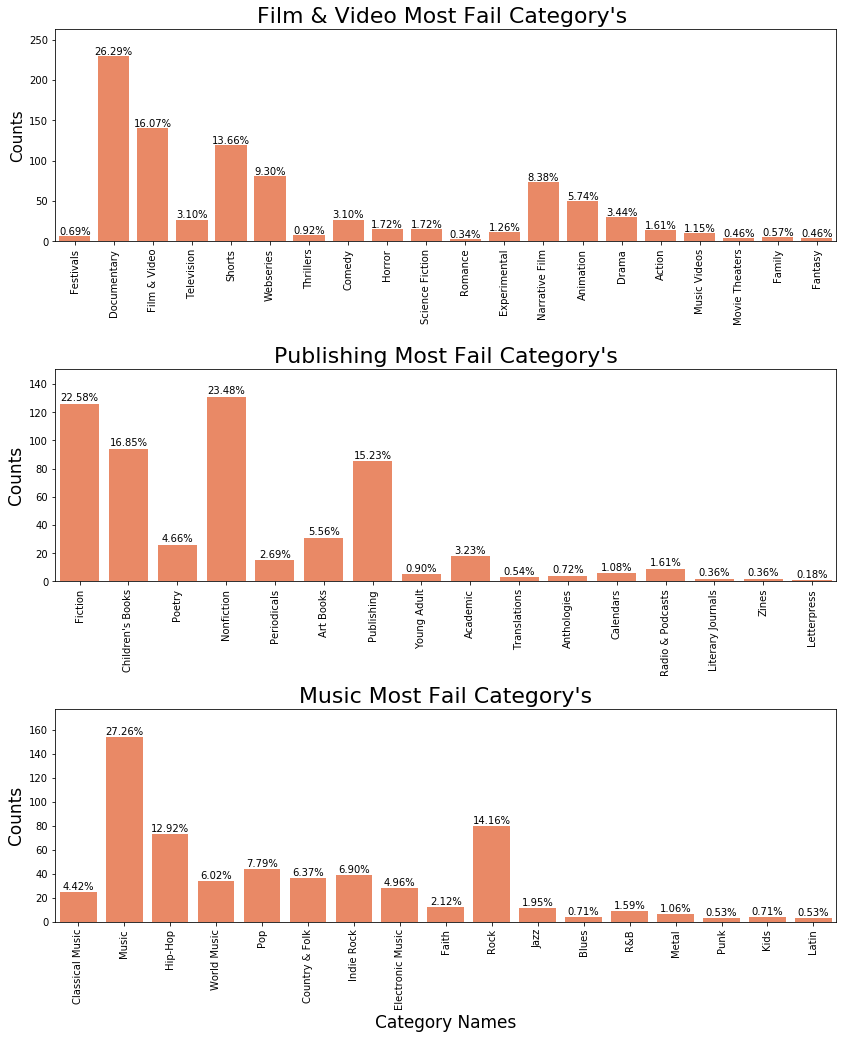

In [24]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film, color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=22)
ax0.set_xlabel("", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_film)*100),
            ha="center", fontsize=10) 
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing, color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Publishing Most Fail Category's", fontsize=22)
ax1.set_xlabel("", fontsize=17)
ax1.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_publishing)*100),
            ha="center", fontsize=10) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music, 
                    color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Music Most Fail Category's", fontsize=22)
ax2.set_xlabel("Category Names", fontsize=17)
ax2.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_music)*100),
            ha="center", fontsize=10) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.6,top = 0.9)

plt.show()

In the musics with sucess the most frequent is Indie, and fails is Rock and Hip Hop! 

Another interesting thing, is that Documentary is a significant value in both states... 

<h1> Looking the time and another features  </h1>


In [25]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date


In [26]:
#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

df_kick['time_campaign'] = round(df_kick['time_campaign_d'] / 30 )

# Months to Campaign

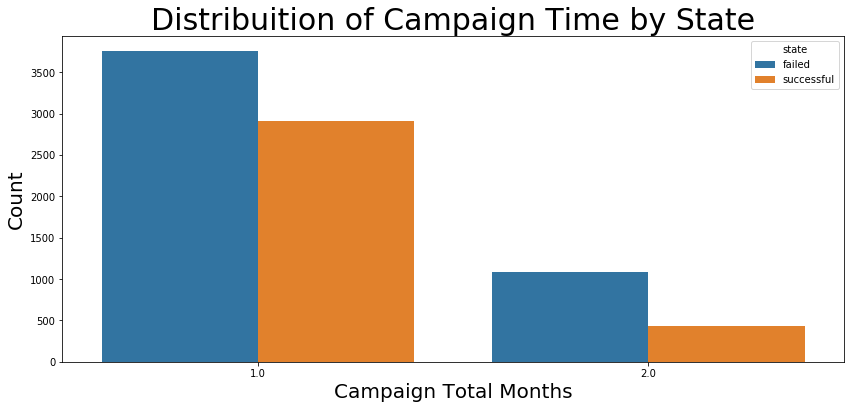

In [27]:
plt.figure(figsize = (14,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[(df_kick['time_campaign'] > .7) & 
                                (df_kick['time_campaign'] < 2.1)])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

The most part of projects have 1 month of campaign. We can see that the ratio of successful one month campaigns is better than projects with 1.5 or 2 months of campaign

# Launched distributions
- Lets see months, years and other interesting informations

In [28]:
df_kick['laun_month_year'] = df_kick.launched.dt.month
df_kick['laun_year'] = df_kick.launched.dt.year


## Launched Year Distributions

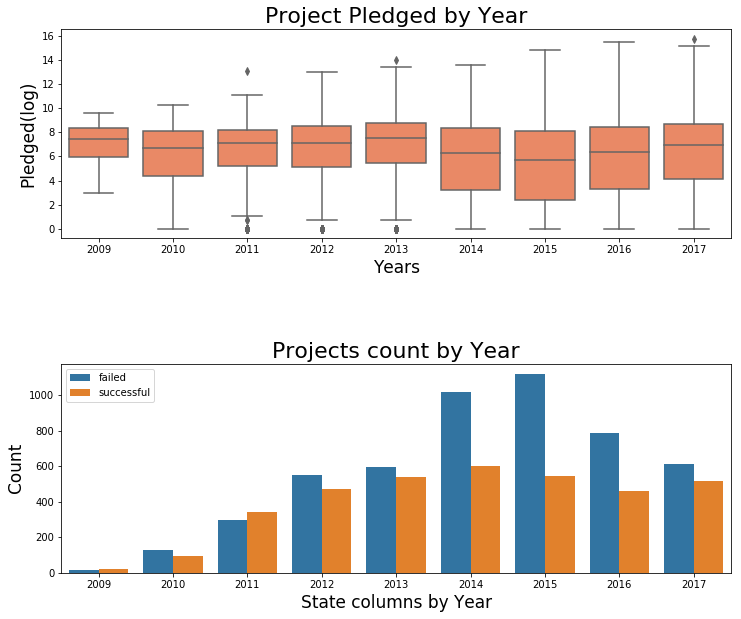

In [29]:
year = df_kick.laun_year.value_counts()
month = df_kick.laun_month_year.value_counts()

fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_year", y='pledged_log', 
                  data=df_kick, color='coral')
ax1.set_title("Project Pledged by Year", fontsize=22)
ax1.set_xlabel("Years", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_year", hue='state', 
                    data=df_kick )
ax2.set_title("Projects count by Year", fontsize=22)
ax2.set_xlabel("State columns by Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper left')

plt.subplots_adjust(hspace = 0.6)

plt.show()


Cool. We can note that 

## Launched Months Distributions

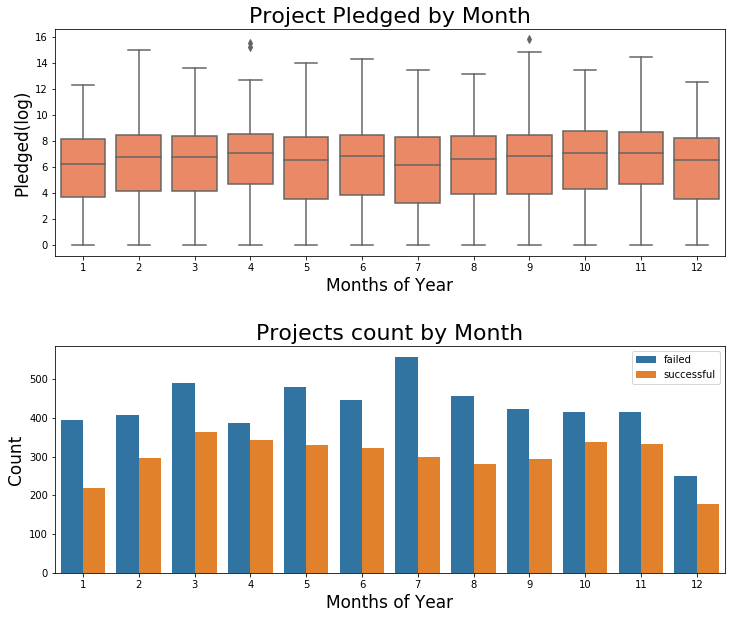

In [30]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_month_year", y='pledged_log', 
                  data=df_kick, color='coral')
ax1.set_title("Project Pledged by Month", fontsize=22)
ax1.set_xlabel("Months of Year", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_month_year", hue='state', 
                    data=df_kick )
ax2.set_title("Projects count by Month", fontsize=22)
ax2.set_xlabel("Months of Year", fontsize=17)
ax2.set_ylabel("Count", fontsize=17)
ax2.legend(loc='upper right')

plt.subplots_adjust(hspace = 0.4)

plt.show()


We can note that all months are very similar. 

## Taking a look athe the distribuition of Diff Pledged sucessful and failed Projects

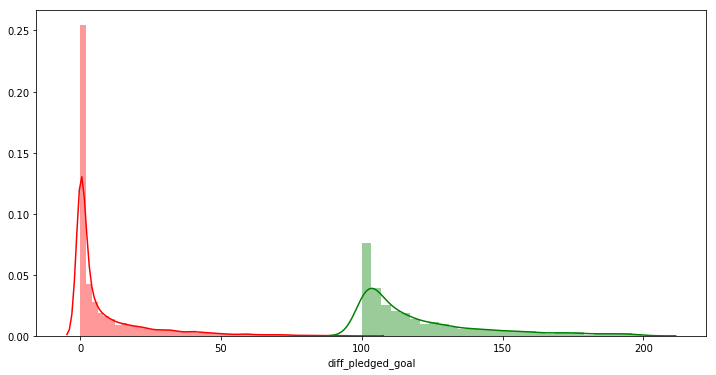

In [31]:
plt.figure(figsize = (12,6))
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'failed')]['diff_pledged_goal'], color='r')
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'successful')]['diff_pledged_goal'],color='g')
plt.show()

# Month Launched projects

In [32]:
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period('M').astype(str)

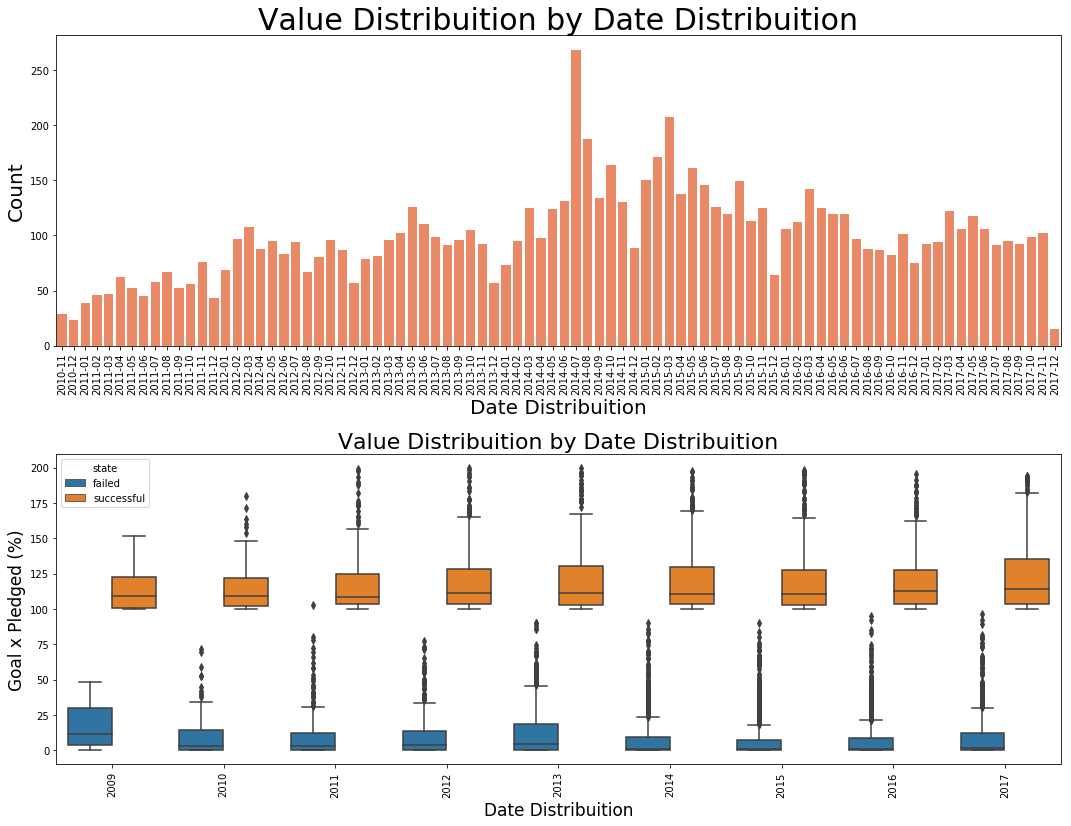

In [33]:
plt.figure(figsize = (18,15))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df_kick, color='coral',
                   order=df_kick['laun_month_year'].value_counts().index.sort_values()[19:] )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pledged_goal",
                 data=df_kick[df_kick['diff_pledged_goal'] < 200], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=22)
g2.set_xlabel("Date Distribuition", fontsize=17)
g2.set_ylabel("Goal x Pledged (%)", fontsize=17)

plt.show()

Cool. We can see that in august 2018 was the peak of projects launched. 
Looking the difference pledged x goal between failed and sucessful 

# Goals 

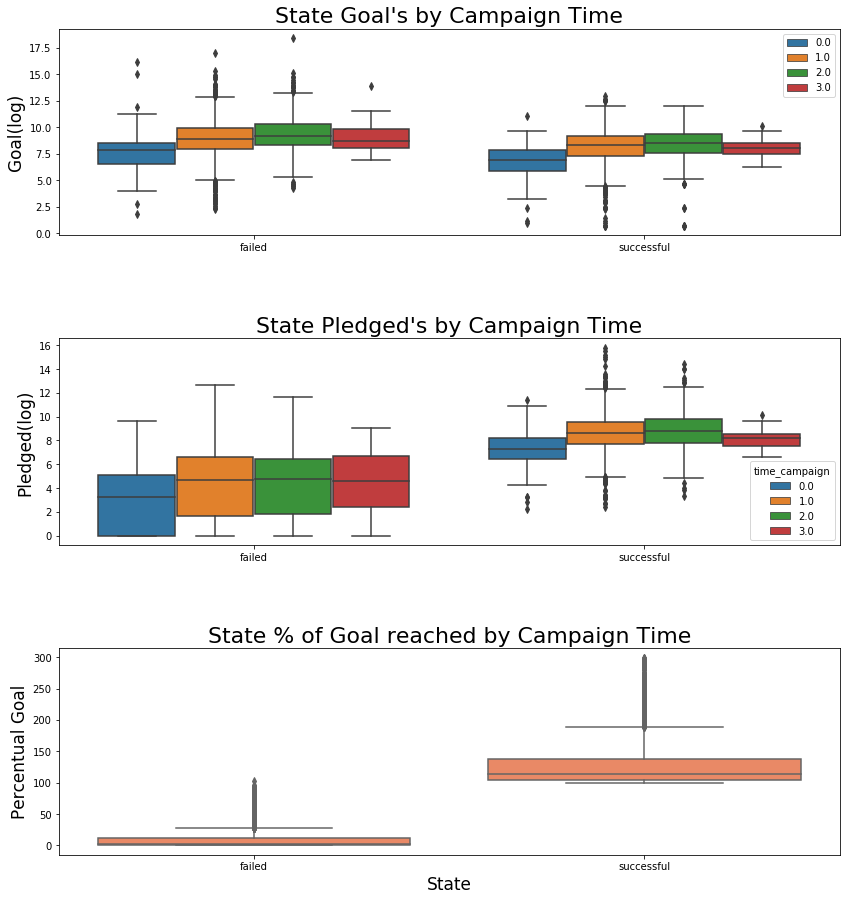

In [34]:
plt.figure(figsize = (14,17))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(311)
g =sns.boxplot(x='state', y='goal_log', 
            data=df_kick, 
            hue='time_campaign')
g.set_title("State Goal's by Campaign Time", fontsize=22)
g.set_xlabel("", fontsize=17)
g.set_ylabel("Goal(log)", fontsize=17)
g.legend(loc='upper right')

plt.subplot(312, sharex=g)
g1 = sns.boxplot(x='state', y='pledged_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g1.set_title("State Pledged's by Campaign Time", fontsize=22)
g1.set_xlabel("", fontsize=17)
g1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(313)
g2 = sns.boxplot(x='state', y='diff_pledged_goal', color='coral',
                 data=df_kick[df_kick['diff_pledged_goal'] < 300])
g2.set_title("State % of Goal reached by Campaign Time", fontsize=22)
g2.set_xlabel("State", fontsize=17)
g2.set_ylabel("Percentual Goal", fontsize=17)


plt.show()

Humm... Its an very interesting information.<br>
On the first chart, we can clearly see that projects with more than 30 to 60 days have highest vales pledged, what make many sense. <br>
Also, we can see that the median of goal reached is like to 120;  Let's s

In [35]:
df_kick.groupby(['state'])['diff_pledged_goal'].median()

state
failed          1.670
successful    116.605
Name: diff_pledged_goal, dtype: float64

# Distribution of Backers

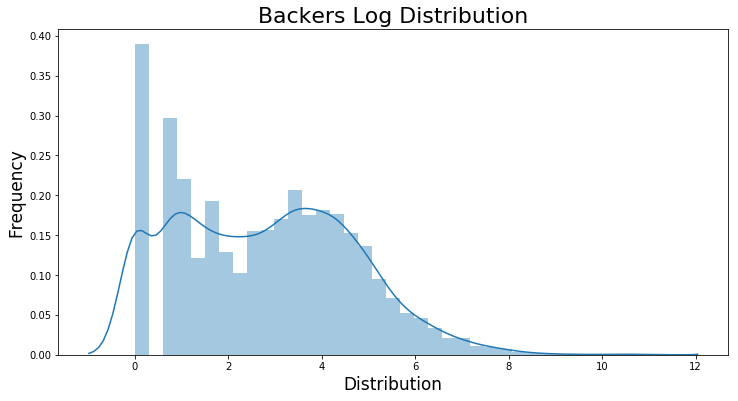

In [36]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (12,6))
g = sns.distplot(df_kick['backers_log'])
g.set_xlabel("Distribution", fontsize=17)
g.set_ylabel("Frequency", fontsize=17)
g.set_title("Backers Log Distribution", fontsize=22)

plt.show()

# Backers by State

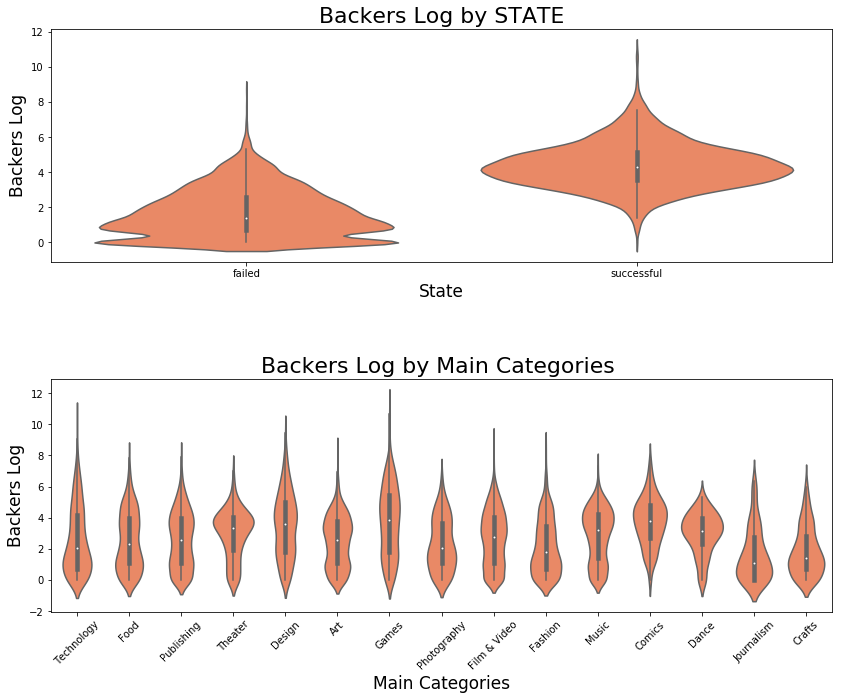

In [37]:
plt.figure(figsize = (14,12))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(211)
g = sns.violinplot(x='state',y='backers_log',
                   color='coral', data=df_kick)
g.set_title("Backers Log by STATE", fontsize=22)
g.set_xlabel("State", fontsize=17)
g.set_ylabel("Backers Log", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x='main_category',y='backers_log', 
                   color='coral', data=df_kick)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Backers Log by Main Categories ", fontsize=22)
g1.set_xlabel("Main Categories", fontsize=17)
g1.set_ylabel("Backers Log", fontsize=17)

plt.show()

## Backers by Years

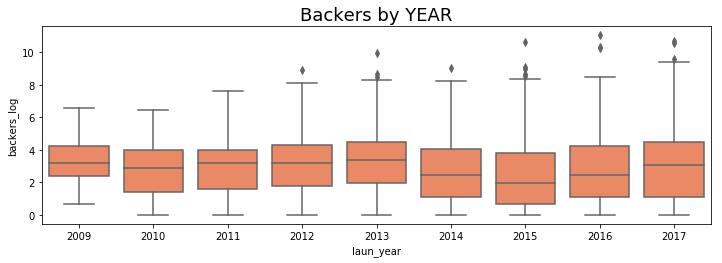

In [38]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
                color='coral',
               data=df_kick, 
                order=df_kick['laun_year'].value_counts().index.sort_values().values)
g.set_title("Backers by YEAR", fontsize=18)

plt.show()

# Word Cloud - Project Names

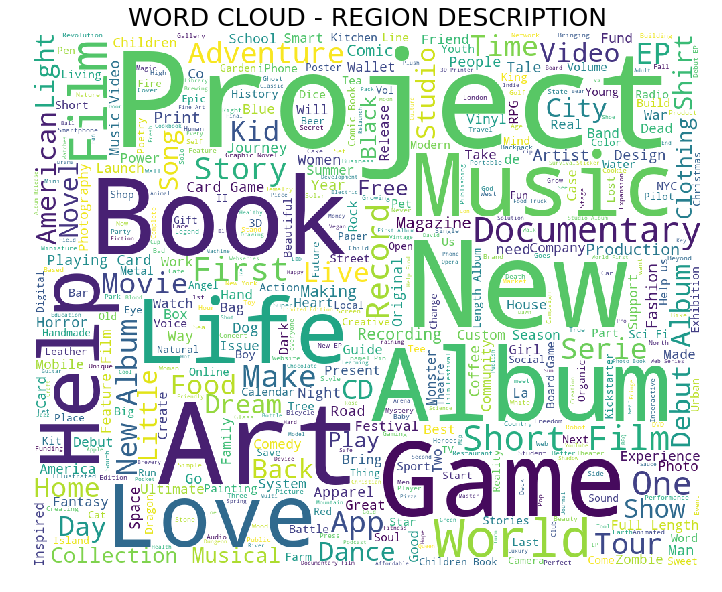

In [39]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kick['name'].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - REGION DESCRIPTION",fontsize=25)
plt.axis('off')

plt.show()

# Modeling 
I will reimport the dataset, but now I use it FULL

## ML needed Libraries 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [41]:
df_kick = pd.read_csv("../input/ks-projects-201801.csv")

# Filtering by successful and failed projects

In [42]:
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])]

## encoding our target

In [43]:
targ_dict = {'failed': 0,
             'successful': 1 
            }

df_kick['state'] = df_kick['state'].map(targ_dict)

# Dealing with date features

In [44]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date

#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

In [45]:
to_drop = ['ID', 'name', 'deadline', 'pledged', 'backers', 'goal',
            'usd pledged', 'usd_pledged_real','launched_date', 'deadline_date']

In [46]:
df_kick.drop(to_drop, axis=1, inplace=True)

# Head of data after droping

In [47]:
df_kick.head()

category main_category currency            launched  state country  \
0          Poetry    Publishing      GBP 2015-08-11 12:12:28      0      GB   
1  Narrative Film  Film & Video      USD 2017-09-02 04:43:57      0      US   
2  Narrative Film  Film & Video      USD 2013-01-12 00:20:50      0      US   
3           Music         Music      USD 2012-03-17 03:24:11      0      US   
5     Restaurants          Food      USD 2016-02-26 13:38:27      1      US   

   usd_goal_real  time_campaign_d  
0        1533.95               59  
1       30000.00               60  
2       45000.00               45  
3        5000.00               30  
5       50000.00               35

In [48]:
df_kick = df_kick.assign(hour=df_kick.launched.dt.hour,
                         day=df_kick.launched.dt.day,          
                         month=df_kick.launched.dt.month,
                         year=df_kick.launched.dt.year).drop('launched', axis=1)

# Get Dummies

In [49]:
print(f'Shape before dummy transformation: {df_kick.shape}')
df_kick = pd.get_dummies(df_kick, columns=['category', 'main_category', 'currency', 'country'],\
                          prefix=['cat', 'main_cat', 'currency', 'country'], drop_first=True)

print(f'Shape after dummy transformation: {df_kick.shape}')

Shape before dummy transformation: (331675, 11)
Shape after dummy transformation: (331675, 214)


Cool. Now we have a sparse table;

# MinMax Scaler

In [50]:
num_cols = ['usd_goal_real', 'time_campaign_d']

for col in num_cols:
    df_kick[col] = (minmax_scale(df_kick[col], feature_range=(0,1)))

# Spliting our data in train, validation and test sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_kick.drop('state', axis=1), df_kick['state'], 
                                                    test_size=.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.15, random_state=42)

# Shape of data after spliting the data

In [52]:
print(f'Shape train: {X_train.shape}')
print(f'Shape valid: {X_val.shape}')
print(f'Shape test: {X_test.shape}')

Shape train: (225539, 213)
Shape valid: (39801, 213)
Shape test: (66335, 213)


# Models Pipeline

LogReg: 0.713009 (+/- 0.002954)
XGBClassifier: 0.735225 (+/- 0.002832)
DecisionTreeClassifier: 0.594193 (+/- 0.001161)
RandomForestClassifier: 0.735806 (+/- 0.001278)
GradientBoostingClassifier: 0.744727 (+/- 0.002911)
RidgeClassifier: 0.693229 (+/- 0.002581)
BaggingRidgeClassifier: 0.693612 (+/- 0.001676)
ExtraTreesClassifier: 0.675114 (+/- 0.002314)


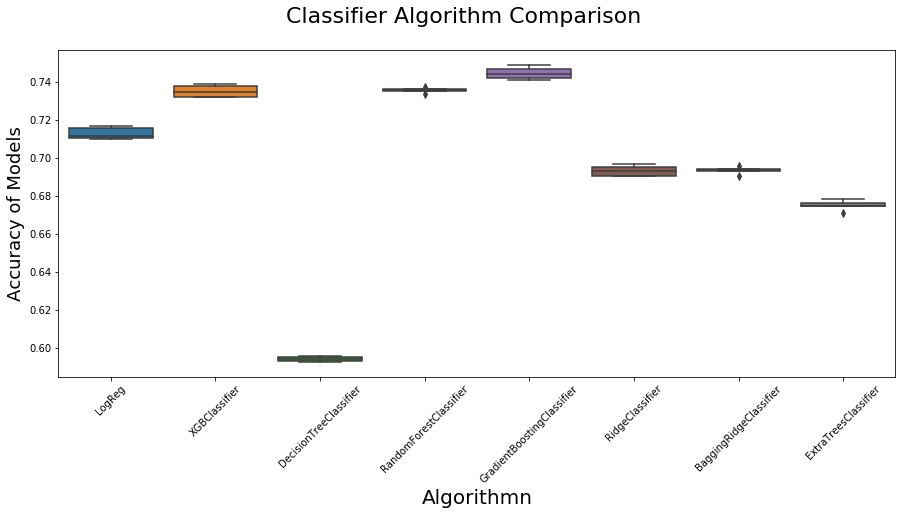

In [53]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

Cool Gradient Boosting, XGB have the best results so I will select them. <br>
Also, I will seelect the Logistic Regression too. 
<br>
The Decision tree and Extra trees are the models with the lowest roc_auc scores.

# Predicting the X_test with best models

#### function to get different models score

In [54]:
from sklearn.metrics import roc_auc_score
def get_models_score(model, X, y, X_val, y_val):
    # Using the model in X_train and y_train desired
    model.fit(X, y)
    
    # Predicting our validation test
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    
    return score, y_pred

## GradientBoostClassifier

In [55]:
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=42) 

score, pred = get_models_score(gb_clf, X_train, y_train,
                                X_test, y_test)

print(f'Score of: {score} \n')
#print("Confusion Matrix: ")
#print(confusion_matrix(y_test, pred))

Score of: 0.7492588989762836 



Cool!!! <br>
Now, let's see if the Logreg will be better or worst. It would be interesting if we use hyperopt to optimze the parameters, but I will start by a benchmark. 

# Logistic Regression

In [56]:
lr_clf = LogisticRegression(n_jobs=-1) 

score, pred = get_models_score(lr_clf, X_train, y_train, 
                               X_test, y_test)

print(f'Score of: {score} \n')
#print("Confusion Matrix: ")
#print(confusion_matrix(y_test, pred))

Score of: 0.6889010590827982 



# NOTE: This kernel isn't finished 

## Some fonts that I used to the statistical tests: 
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ <br>
http://math.hws.edu/javamath/ryan/ChiSquare.html<br>
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce <br>
http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf <br>